In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import yfinance as yf
from datetime import datetime


In [40]:

# download the data
df = yf.download('BTC-USD', start='2021-01-01', end=datetime.now())

y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)



[*********************100%***********************]  1 of 1 completed


In [ ]:
# Save the forecast results to CSV
df.to_csv('BTC-USD.csv')

In [49]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782


In [43]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,1590.000000,1590.000000,1590.000000,1590.000000,1.590000e+03
mean,46641.555303,47603.299033,45543.274496,46597.963585,3.392088e+10
std,22634.011044,23054.587710,22137.314993,22595.588844,2.130300e+10
min,15787.284180,16253.047852,15599.046875,15782.300781,5.331173e+09
25%,28040.041992,28496.515625,27410.147461,28039.625488,1.997811e+10
50%,42237.923828,43033.376953,41399.984375,42200.968750,2.955452e+10
75%,61195.772461,62464.168945,60008.805664,61168.252930,4.098692e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [50]:
print(df.columns) 

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])


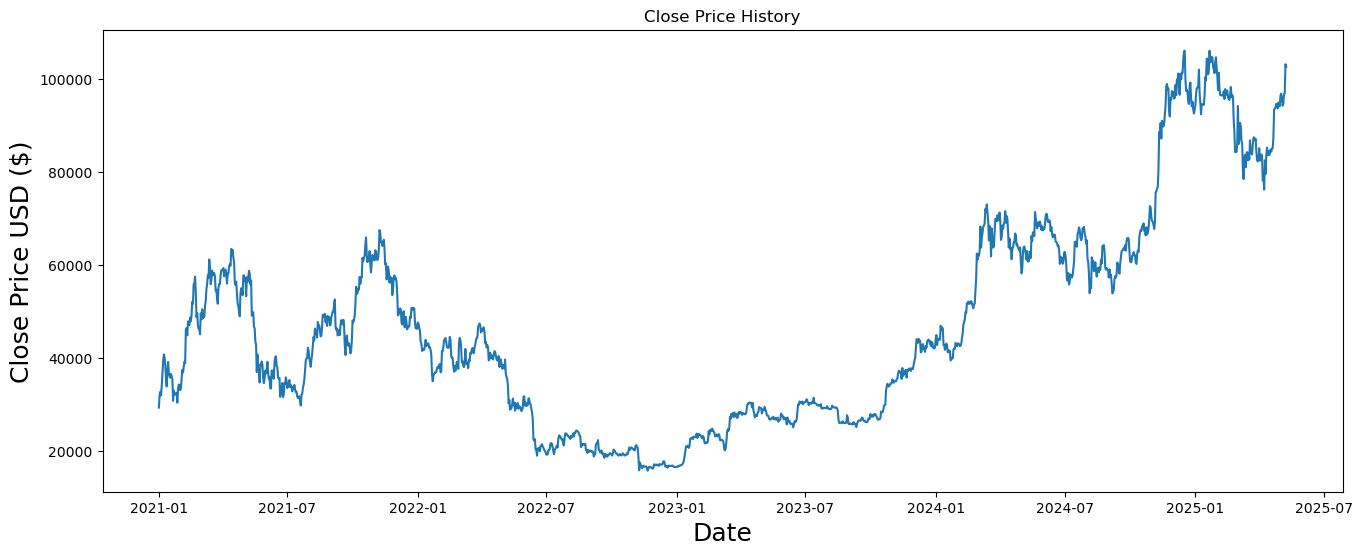

In [44]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [51]:
# Create a new dataframe with only the 'Close column 
data = df[('Close', 'BTC-USD')]

data = data.to_frame()
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1511

In [53]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15036544],
       [0.18083408],
       [0.18808024],
       ...,
       [0.89913625],
       [0.96785262],
       [0.96195194]])

In [54]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([0.15036544, 0.18083408, 0.18808024, 0.17911479, 0.20147577,
       0.23281669, 0.26100072, 0.27678848, 0.27077843, 0.24977215,
       0.21889769, 0.20070696, 0.2382616 , 0.25896755, 0.2328278 ,
       0.22566497, 0.22138356, 0.2306665 , 0.22446602, 0.21868845,
       0.16642967, 0.19055635, 0.18017421, 0.18262816, 0.18348047,
       0.18573212, 0.16207866, 0.19565087, 0.20506099, 0.20454236,
       0.1917582 , 0.19643749, 0.21827387, 0.23998506, 0.23394224,
       0.24742448, 0.25983834, 0.25582578, 0.33653744, 0.33968755,
       0.32239075, 0.35549369, 0.35101732, 0.34659788, 0.36443533,
       0.35588908, 0.36977605, 0.40241405, 0.39722131, 0.44379483,
       0.44613424, 0.46207538, 0.42519333, 0.365621  , 0.37536997,
       0.34646879, 0.33812331, 0.33644878, 0.3248209 , 0.37455002])]
[0.36069136216733266]

[array([0.15036544, 0.18083408, 0.18808024, 0.17911479, 0.20147577,
       0.23281669, 0.26100072, 0.27678848, 0.27077843, 0.24977215,
       0.21889769, 0.20070696, 0.23

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\NITRO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1451/1451 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0054


In [56]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


3595.9234359434977

C:\Users\NITRO\AppData\Local\Temp\ipykernel_15696\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


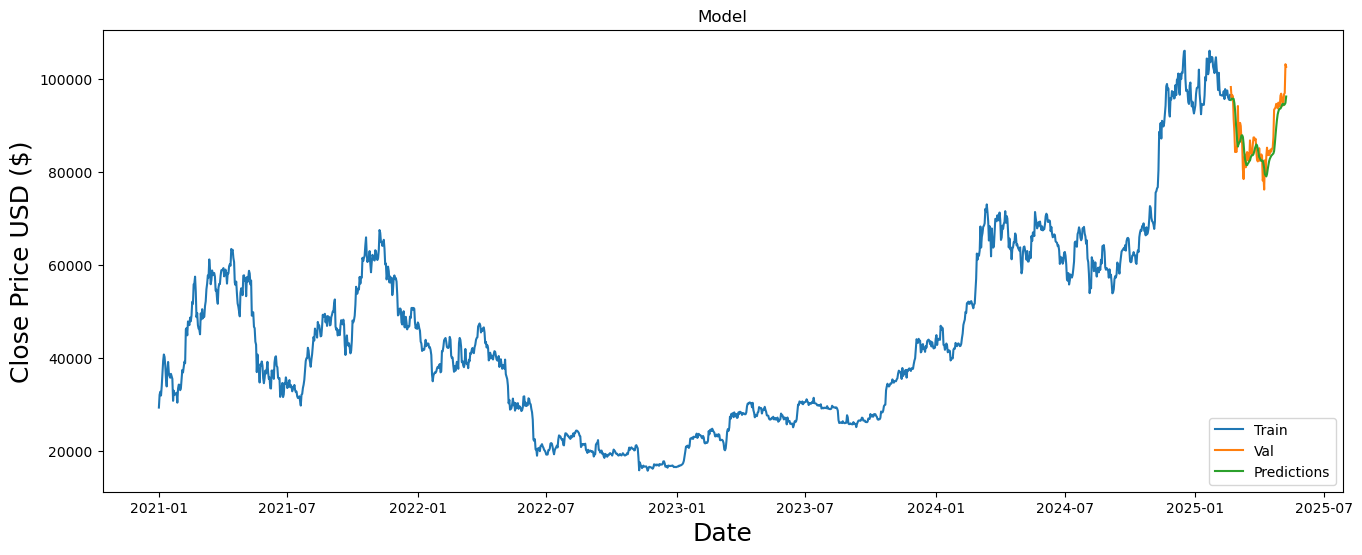

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [58]:
# Save the forecast results to CSV
df.to_csv('valid.csv')

In [59]:
# Show the valid and predicted prices
valid

,Close,Predictions
,BTC-USD,
Date,,
2025-02-20,98333.937500,95550.617188
2025-02-21,96125.546875,95796.609375
2025-02-22,96577.757812,95820.765625
2025-02-23,96273.921875,95828.085938
2025-02-24,91418.171875,95766.960938
...,...,...
2025-05-05,94748.054688,94640.093750
2025-05-06,96802.476562,94468.734375
